In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.impute import SimpleImputer # import simple imputer
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [24]:
filepath = '../Data/final/Anuradapura_demand.csv'
data = pd.read_csv(filepath, index_col="Month",parse_dates=["Month"])
print(data.shape) 
data.head()

(84, 7)


,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0


In [25]:
data.describe(include='all')

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000
mean,18.291453,28.398810,32.642857,24.151190,114.367857,69.238095,90.397590
std,3.224086,1.349296,1.755356,1.193203,117.104345,6.399584,3.083946
min,8.302096,25.600000,28.600000,20.900000,0.000000,57.000000,83.000000
25%,16.197128,27.150000,31.275000,23.475000,18.500000,65.000000,88.000000
50%,18.773882,28.800000,33.000000,24.350000,73.950000,68.500000,91.000000
75%,20.547705,29.400000,33.925000,25.100000,170.975000,73.250000,92.000000
max,30.408826,31.100000,36.400000,25.900000,463.100000,84.000000,96.000000


In [26]:
data.isnull().sum() #return true/ false. If ture , its a missing place. If false, it contains a values.

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [27]:
sample_data= data.copy()
sample_data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [28]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
sample_data.HumidityNight = imputer.fit_transform(sample_data['HumidityNight'].values.reshape(-1,1))[:,0]

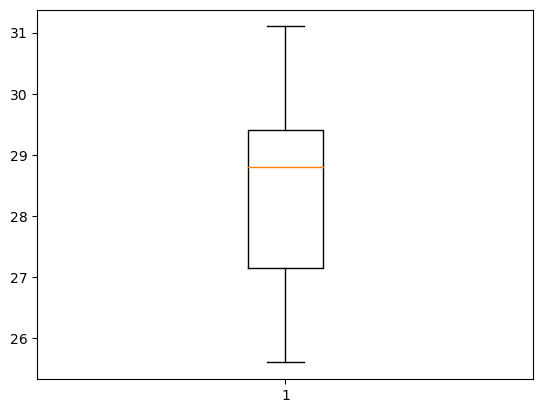

In [29]:
plt.boxplot(sample_data["Temp_Avg"])  #finding outliers
plt.show()

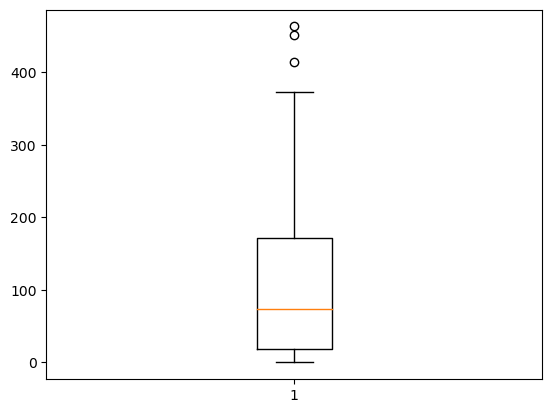

In [30]:
plt.boxplot(sample_data["Rainfall_Avg"])  #finding outliers
plt.show()

<AxesSubplot:>

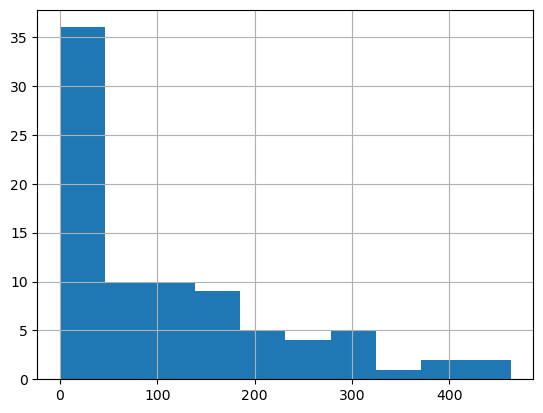

In [31]:
sample_data.Rainfall_Avg.hist()

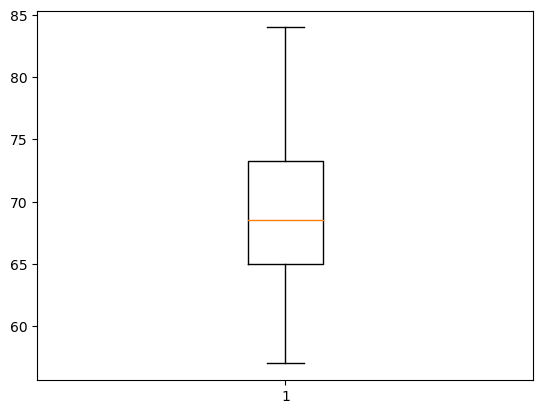

In [32]:
plt.boxplot(sample_data["HumidityDay"])  #finding outliers
plt.show()

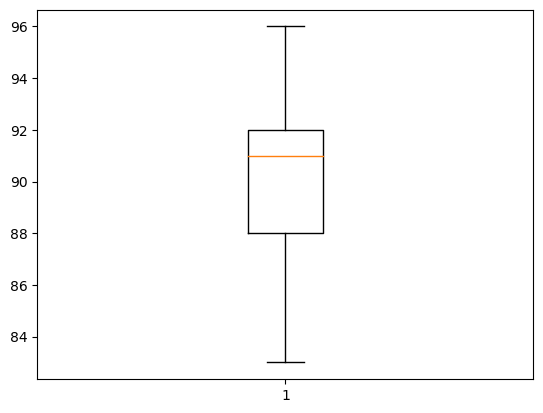

In [33]:
plt.boxplot(sample_data["HumidityNight"])  #finding outliers
plt.show()

In [34]:
# sample_data=sample_data[['Demand','Temp_Avg','Rainfall_Avg','HumidityDay','HumidityNight']]
# sample_data.head()

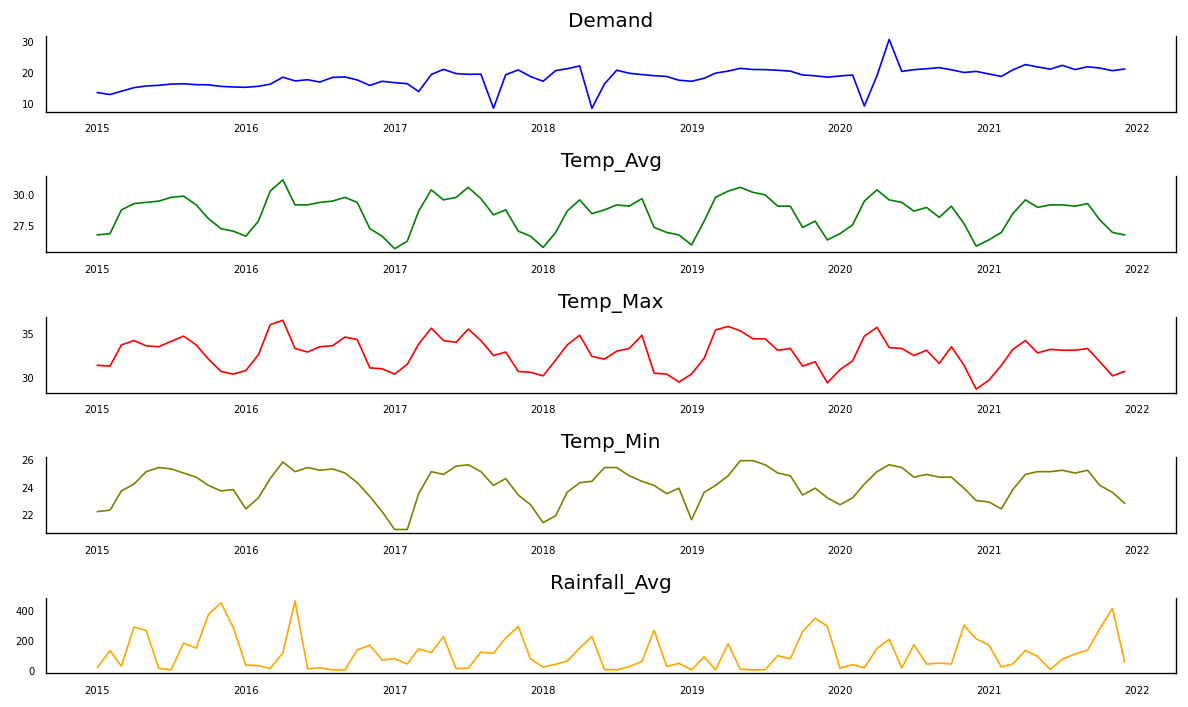

In [35]:
color_list=["blue","green","red","olive","orange"]

fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = sample_data[sample_data.columns[i]]
    ax.plot(data, color=color_list[i%(len(color_list))], linewidth=1)
    
    ax.set_title(sample_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [36]:
#check weather data stationary or not(augmented dickey-fuller test)

ad_fuller_result_1 = adfuller(sample_data['Demand'])#.diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Avg'])#.diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Rainfall_Avg'])#.diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityDay'])#.diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityNight'])#.diff()[1:])

print('Humidity Night')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

# p value shold be , p <0.05

Demand
ADF Statistic: -1.1119295014960004
p-value: 0.7102911867445969

---------------------

Average Temperature
ADF Statistic: -1.5753918887532194
p-value: 0.49594207061054546

---------------------

Average Rainfall
ADF Statistic: -2.6283887033981177
p-value: 0.08727068742609617

---------------------

Humidity Day
ADF Statistic: -1.8632709860780101
p-value: 0.34953186422257965

---------------------

Humidity Night
ADF Statistic: -1.7916457461201944
p-value: 0.3846171659704802


In [37]:
# make first-order differencing 
df_transformed = sample_data.diff().dropna()
df = sample_data.iloc[1:]
print(df.shape)
df_transformed.shape
df_transformed.head()

(83, 7)


,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-02-01,-0.638497,0.1,-0.1,0.1,114.0,2.0,0.0
2015-03-01,1.063440,1.9,2.4,1.4,-103.8,-7.0,-3.0
2015-04-01,1.145510,0.5,0.5,0.5,262.2,4.0,2.0
2015-05-01,0.536840,0.1,-0.6,0.9,-23.5,5.0,0.0
2015-06-01,0.205275,0.1,-0.1,0.3,-254.6,-5.0,-3.0


In [38]:
#check weather data stationary or not(augmented dickey-fuller test)

ad_fuller_result_1 = adfuller(df_transformed['Demand'])#.diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_transformed['Temp_Avg'])#.diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_transformed['Rainfall_Avg'])#.diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_transformed['HumidityDay'])#.diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_transformed['HumidityNight'])#.diff()[1:])

print('Humidity Night')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

# p value shold be , p <0.05

Demand
ADF Statistic: -6.033009049162687
p-value: 1.4033258681841313e-07

---------------------

Average Temperature
ADF Statistic: -7.857229966282125
p-value: 5.40202808209455e-12

---------------------

Average Rainfall
ADF Statistic: -5.687368175368332
p-value: 8.220200933212763e-07

---------------------

Humidity Day
ADF Statistic: -6.98914214510481
p-value: 7.826812143781976e-10

---------------------

Humidity Night
ADF Statistic: -6.636578323519308
p-value: 5.543227661598257e-09


In [39]:
#Test the Granger Causality

max_lags=6
y='Demand'

for i in range(len(df_transformed.columns)-1):
    results=grangercausalitytests(df_transformed[[y,df_transformed.columns[i+1]]],max_lags,verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4)for i in range(max_lags)]
    print('column-{} :P_values - {}'.format(df_transformed.columns[i+1],p_values))

column-Temp_Avg :P_values - [0.0706, 0.1631, 0.1416, 0.1155, 0.1999, 0.2416]
column-Temp_Max :P_values - [0.1172, 0.2916, 0.1653, 0.0857, 0.1827, 0.1591]
column-Temp_Min :P_values - [0.0791, 0.118, 0.1757, 0.2523, 0.3373, 0.4362]
column-Rainfall_Avg :P_values - [0.7672, 0.955, 0.9685, 0.3737, 0.4824, 0.3852]
column-HumidityDay :P_values - [0.3772, 0.6033, 0.5563, 0.1794, 0.3227, 0.1329]
column-HumidityNight :P_values - [0.5067, 0.6753, 0.4282, 0.3585, 0.4036, 0.4475]


In [40]:
df_input=sample_data[['Demand','Temp_Avg']]
df_input

,Demand,Temp_Avg
Month,,
2015-01-01,13.355776,26.7
2015-02-01,12.717279,26.8
2015-03-01,13.780719,28.7
2015-04-01,14.926229,29.2
2015-05-01,15.463069,29.3
...,...,...
2021-08-01,20.739739,29.0
2021-09-01,21.633316,29.2
2021-10-01,21.214337,27.9


In [45]:
df_train=df_input[:-12]
df_test=df_input[-12:]

In [46]:
df_train.shape

(72, 2)

In [47]:
df_test.shape

(12, 2)

In [48]:
model = VAR(df_train.diff()[1:])

In [49]:
sorted_order=model.select_order(maxlags=16)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.099      3.172*       22.17       3.127
1        3.076       3.295       21.68       3.161
2        2.970       3.335       19.52       3.112
3        2.989       3.500       19.93       3.187
4        3.023       3.680       20.67       3.277
5        3.091       3.894       22.25       3.402
6        3.190       4.139       24.73       3.557
7        3.001       4.096       20.69       3.425
8        2.893       4.134       18.82       3.373
9        2.842       4.229       18.19       3.378
10       2.402       3.935      11.99*      2.995*
11       2.449       4.128       12.91       3.098
12       2.411       4.236       12.87       3.117
13       2.482       4.453       14.40       3.244
14       2.378       4.495       13.66       3.197
15       2.454       4.717       15.68       3.329
16      2.200*       4.609     

In [50]:
var_model = VARMAX(df_train, order=(16,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Demand', 'Temp_Avg']   No. Observations:                   72
Model:                            VAR(16)   Log Likelihood                -255.218
                              + intercept   AIC                            648.437
Date:                    Thu, 23 Feb 2023   BIC                            805.526
Time:                            22:04:50   HQIC                           710.974
Sample:                        01-01-2015                                         
                             - 12-01-2020                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             2.03, 6.65   Jarque-Bera (JB):          41.17, 1.04
Prob(Q):                        0.15, 0.01   Prob(JB):                   0.00, 0.60
Heteroskedasticity (H):         2.33, 0.75   Skew:                      -0.80, 0.22
P

In [51]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)
predictions=predict.predicted_mean

In [52]:
predictions.columns=['Demand_predicted','Temp_Avg_predicted']
predictions

,Demand_predicted,Temp_Avg_predicted
2021-01-01,17.959786,27.090562
2021-02-01,17.352181,27.927133
2021-03-01,18.025990,29.024670
2021-04-01,19.389260,29.432383
2021-05-01,19.903125,29.341620
2021-06-01,20.866339,28.934976
2021-07-01,20.965888,28.417947
2021-08-01,19.848377,28.482735
2021-09-01,19.523451,28.544384
2021-10-01,19.900186,28.458630


In [53]:
test_vs_pred=pd.concat([df_test,predictions],axis=1)
test_vs_pred

,Demand,Temp_Avg,Demand_predicted,Temp_Avg_predicted
2021-01-01,19.324695,26.3,17.959786,27.090562
2021-02-01,18.543998,26.9,17.352181,27.927133
2021-03-01,20.638740,28.4,18.025990,29.024670
2021-04-01,22.340633,29.5,19.389260,29.432383
2021-05-01,21.584340,28.9,19.903125,29.341620
2021-06-01,20.875111,29.1,20.866339,28.934976
2021-07-01,22.094731,29.1,20.965888,28.417947
2021-08-01,20.739739,29.0,19.848377,28.482735
2021-09-01,21.633316,29.2,19.523451,28.544384
2021-10-01,21.214337,27.9,19.900186,28.458630


<AxesSubplot:>

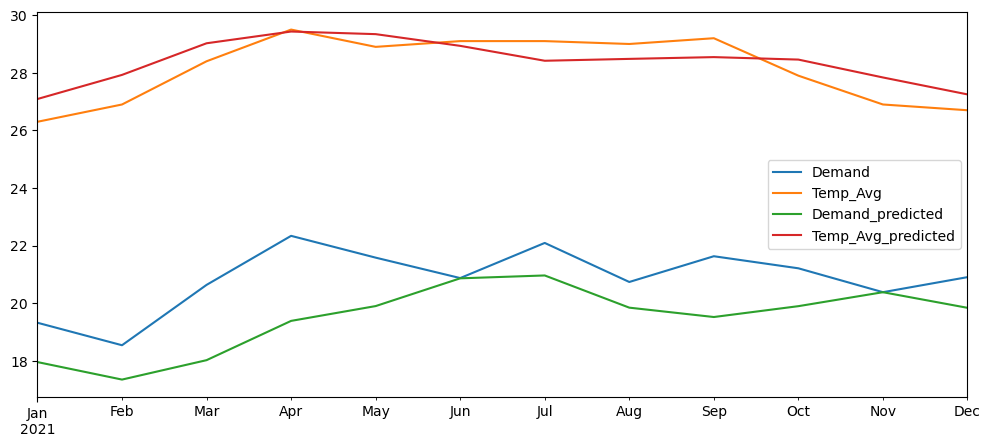

In [54]:
test_vs_pred.plot(figsize=(12,5))

In [55]:
Mean_Square_Error=mean_squared_error(df_test,predictions)
print(Mean_Square_Error)

1.4992850939695705


In [30]:
Root_Mean_Square_Error=sqrt(mean_squared_error(df_test,predictions))
print(Root_Mean_Square_Error)

1.2244529774432216


In [31]:
Mean_Absolute_Error=mean_absolute_error(df_test,predictions)
print(Mean_Absolute_Error)

0.9724638097991453


In [56]:
Mean_Absolute_Precentage_Error=mean_absolute_percentage_error(df_test,predictions)
print(Mean_Absolute_Precentage_Error)

0.04288067187388993
